<a href="https://colab.research.google.com/github/fischsauce/Medical_Transfer-Learning/blob/master/Medical_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Analysis



> ### ...using a de-capitated inception V3 & Transfer Learning :P



### With a little help from Keras!

In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# GET TO THE DATA!

In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/dataset/chest-xray-pneumonia.zip

Archive:  /content/drive/My Drive/Colab Notebooks/dataset/chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/N

In [0]:
train_path = './chest_xray/train/'
validate_path = './chest_xray/val/'
test_path = './chest_xray/test/'

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread(train_path + '/NORMAL/')
# imgplot = plt.imshow(img)
# plt.show()

## Thanks to MannyB for this helper function:

In [0]:
 ## Thanks to MannyB for this helper function:
  
  def plot_images(type="normal", num=3):
    counter = 0
    fig = plt.figure(figsize=(10,8))
    
    for file in os.listdir(train_path + type.upper()):
      if file.endswith(".jpeg"):
        if counter == num:
          break
        img = mpimg.imread(train_path + type.upper() + "/" + file)
        plt.subplot(231 + counter)
        plt.title(file.split('.')[0])
        imgplot = plt.imshow(img)
        counter += 1

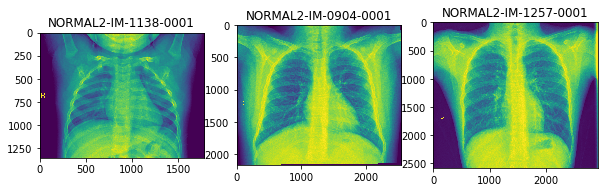

In [7]:
plot_images()

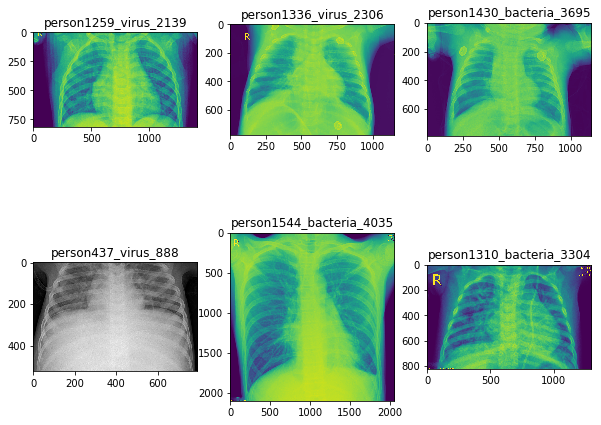

In [8]:
plot_images(type="pneumonia", num=6)

# Siraj wants us to do transfer learning from a existing model ('inception v3')

In [9]:

# So let's import keras, tensorflow etc. and download that model:


import keras
import tensorflow as tf

import numpy as np

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.python.keras.preprocessing import image

pre_model = InceptionV3(weights='imagenet')

Using TensorFlow backend.










96116736/96112376 [==============================] - 4s 0us/step


In [0]:
## More imports...

from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

## Now we want to look at the incepetionv3 model and get it into a format where we can output a binary classification from the final layer...

### > This can be done by setting: `(IncludeTop=False) ` when importing the model.



*Thanks for this tutorial - the best explanation on transfer learning with Keras which i found: *italicized text* https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e


In [0]:

## Ok, so let's re-import the model with this new knowledge in mind...

pre_model = InceptionV3(weights ='imagenet', include_top = False) #imports the mobilenet model and discards the last 1000 neuron layer.

x = pre_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation ='relu')(x)        #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation = 'relu')(x)       #dense layer 2        #dense layer 3
# preds = Dense(2, activation = 'softmax')(x)   #final layer with softmax activation
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# x = BatchNormalization()(x)
preds = Dense(2, activation = 'softmax')(x)


In [139]:
print(x)

Tensor("dense_30/Relu:0", shape=(?, 512), dtype=float32)


## Christen our new model:

In [0]:


post_model = Model(inputs = pre_model.input, outputs = preds)


## Inspect the new model's shape:



In [141]:


for i, layer in enumerate(post_model.layers):
  print(i, layer.name)

0 input_14
1 conv2d_1190
2 batch_normalization_1191
3 activation_1189
4 conv2d_1191
5 batch_normalization_1192
6 activation_1190
7 conv2d_1192
8 batch_normalization_1193
9 activation_1191
10 max_pooling2d_52
11 conv2d_1193
12 batch_normalization_1194
13 activation_1192
14 conv2d_1194
15 batch_normalization_1195
16 activation_1193
17 max_pooling2d_53
18 conv2d_1198
19 batch_normalization_1199
20 activation_1197
21 conv2d_1196
22 conv2d_1199
23 batch_normalization_1197
24 batch_normalization_1200
25 activation_1195
26 activation_1198
27 average_pooling2d_115
28 conv2d_1195
29 conv2d_1197
30 conv2d_1200
31 conv2d_1201
32 batch_normalization_1196
33 batch_normalization_1198
34 batch_normalization_1201
35 batch_normalization_1202
36 activation_1194
37 activation_1196
38 activation_1199
39 activation_1200
40 mixed0
41 conv2d_1205
42 batch_normalization_1206
43 activation_1204
44 conv2d_1203
45 conv2d_1206
46 batch_normalization_1204
47 batch_normalization_1207
48 activation_1202
49 activatio

## From the prior tutorial: 

> "we have to set all the weights to be non-trainable. We will only be training the last Dense layers that we have made previously"







In [0]:
# for layer in pre_model.layers:
    layer.trainable = False

#     ^This^ previous command held me up for ages, before I realized none of the new layers I had added were trainable! :-O

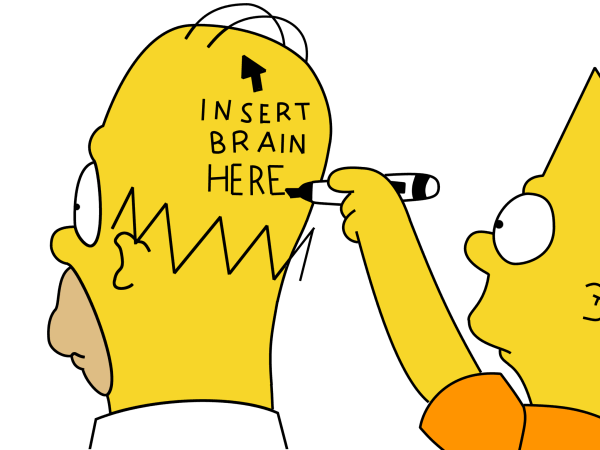

In [171]:
from IPython.display import Image
Image('insertbrain.jpg')


In [142]:
for layer in pre_model.layers[:310]:
    layer.trainable = False
    
for layer in post_model.layers:
    if layer.trainable == True: 
      print("is trainable")
      
# This looks like a better: the top layers are trainable:

is trainable
is trainable
is trainable
is trainable
is trainable


# Go go ImageDataGenerator!

Perhaps the single best reason I found to keep using Keras is this set of functions for neatly setting up, reading and defining datasets.

In [143]:

# shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         width_shift_range=0.1,
#         height_shift_range=0.1

train_datagen = ImageDataGenerator(rescale=1./255) #included in our dependencies

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(256,256),
                                                    batch_size=64,
                                                    class_mode='categorical')

validate_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validate_datagen.flow_from_directory(validate_path,
                                                            target_size=(256, 256),
                                                            batch_size=4,
                                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(256, 256),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Training the new model

For this we first compile the model that we made, and then train our model with our generator.

In [0]:

post_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [145]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_validate = validation_generator.n // validation_generator.batch_size

# final_model.fit_generator(
#         train_generator, #train data generator 
#         steps_per_epoch=len(train_generator),
#         epochs=5,
#         validation_data=val_generator, #validation data generator 
#         validation_steps=len(val_generator))

post_model.fit_generator(train_generator, 
                         steps_per_epoch = step_size_train, 
                         epochs=10, 
                         validation_data = validation_generator, 
                         validation_steps = step_size_validate) 

Epoch 1/10
81/81 [==============================] - 93s 1s/step - loss: 0.4209 - acc: 0.8279 - val_loss: 3.1504 - val_acc: 0.5000
Epoch 2/10
81/81 [==============================] - 68s 837ms/step - loss: 0.2118 - acc: 0.9176 - val_loss: 2.7257 - val_acc: 0.5000
Epoch 3/10
81/81 [==============================] - 68s 845ms/step - loss: 0.1958 - acc: 0.9184 - val_loss: 2.4337 - val_acc: 0.5000
Epoch 4/10
81/81 [==============================] - 69s 852ms/step - loss: 0.1550 - acc: 0.9348 - val_loss: 2.3967 - val_acc: 0.5000
Epoch 5/10
81/81 [==============================] - 68s 843ms/step - loss: 0.1398 - acc: 0.9468 - val_loss: 2.9701 - val_acc: 0.5000
Epoch 6/10
81/81 [==============================] - 69s 848ms/step - loss: 0.1409 - acc: 0.9462 - val_loss: 2.7795 - val_acc: 0.5000
Epoch 7/10
81/81 [==============================] - 69s 847ms/step - loss: 0.1272 - acc: 0.9535 - val_loss: 2.0842 - val_acc: 0.5000
Epoch 8/10
81/81 [==============================] - 68s 844ms/step - los

# Validation loss is still high, but we're heading in the right direction...

**When first running I get this error:**

> ValueError: Error when checking target: expected dense_4 to have shape (120,) but got array with shape (2,)

I suppose it's that final output layer we added....

Yep, the problem was number of categories. All fixed now

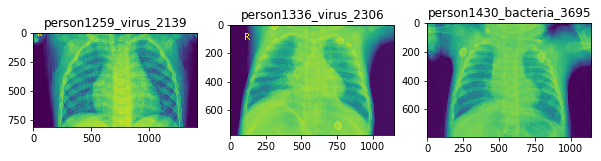

In [146]:
plot_images(type="pneumonia", num=3)

In [151]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [152]:
#Generate all predictions
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = post_model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)

predict

array([1, 1, 1, ..., 1, 1, 1])

## tHANKS once again to Manny B for this testing script:

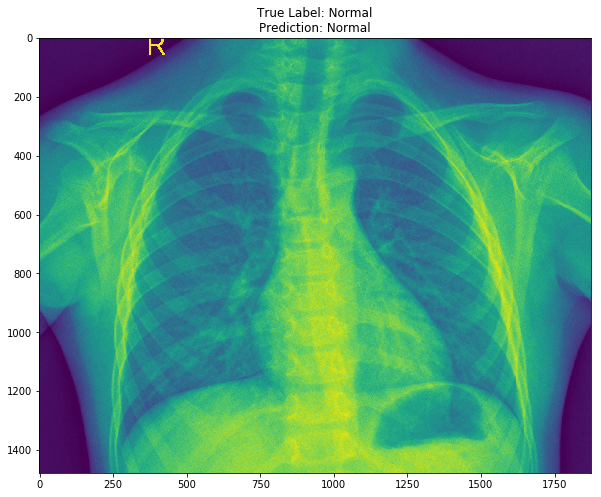

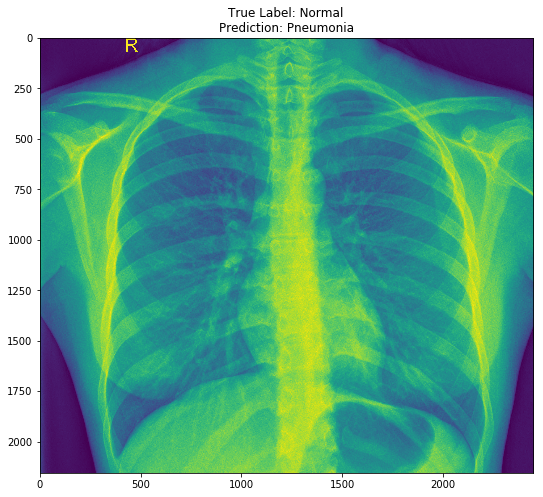

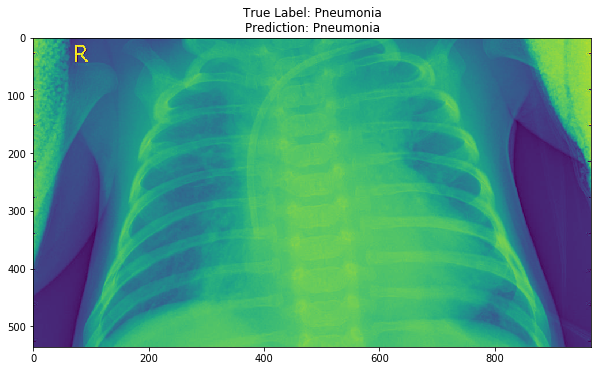

In [169]:


filenames = ["/content/chest_xray/test/NORMAL/IM-0010-0001.jpeg",  
           "/content/chest_xray/test/NORMAL/IM-0013-0001.jpeg",
           "/content/chest_xray/test/PNEUMONIA/person109_bacteria_527.jpeg"]

num = len(filenames)

for filename in filenames: 
  counter = 0
  fig = plt.figure(figsize=(10,8))
  
  if counter == num:
    break
  img = image.load_img(filename, 
                     target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  y = post_model.predict(x)

  predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
  actual="Normal" if "NORMAL" in filename else "Pneumonia" 

  img=mpimg.imread(filename)
  title_text = ("%s%s%s%s%s"%("True Label: ", actual, "\n", "Prediction: ", predicton))
  plt.title(title_text)
  
  
  imgplot=plt.imshow(img)
  counter += 1


in the immortal words of Meatloaf: two out of three ain't bad!